In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [35]:
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = w * X + b
    cost = (1/m) * np.sum((y_pred - y) ** 2) # No loop needed: NumPy broadcasts the operations and vectorizes the summation.
    return cost

def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = len(y)
    history = []

    for i in range(epochs):
        y_pred = w * X + b
        error = y_pred - y

        dw = (2/m) * np.sum(error * X)
        db = (2/m) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost(X, y, w, b)
        history.append(cost)

        if i % 100 == 0 or i == epochs - 1:
            print(f"Epoch {i}: w = {w:.4f}, b = {b:.4f}, cost = {cost:.4f}")

    return w, b, history

In [36]:
w_init = 0
b_init = 0
learning_rate = 0.1
epochs = 125
w_final, b_final, cost_history = gradient_descent(X, y, w_init, b_init, learning_rate, epochs)

Epoch 0: w = 1.5574, b = 1.3998, cost = 18.0670
Epoch 100: w = 2.8736, b = 4.2008, cost = 0.8001
Epoch 124: w = 2.8565, b = 4.2206, cost = 0.7998


Anything more than 125 epochs will return the same cost, so that's sufficient.

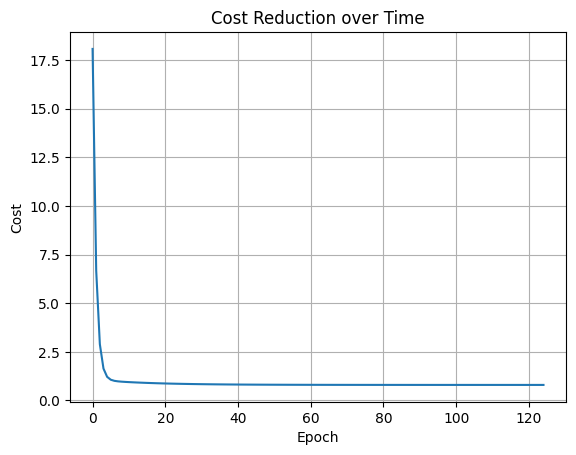

In [37]:
plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.grid(True)
plt.show()

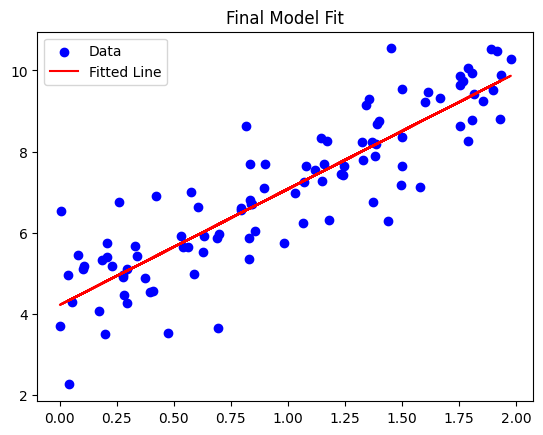

In [38]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, w_final * X + b_final, color='red', label='Fitted Line')
plt.legend()
plt.title('Final Model Fit')
plt.show()